In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv('heart.csv')
df.sample(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
276,58,1,0,146,218,0,1,105,0,2.0,1,1,3,0
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3,0
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
147,60,0,3,150,240,0,1,171,0,0.9,2,0,2,1
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0
46,44,1,2,140,235,0,0,180,0,0.0,2,0,2,1
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
97,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
50,51,0,2,130,256,0,0,149,0,0.5,2,0,2,1


In [41]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [42]:
df.drop_duplicates(inplace=True)

              age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

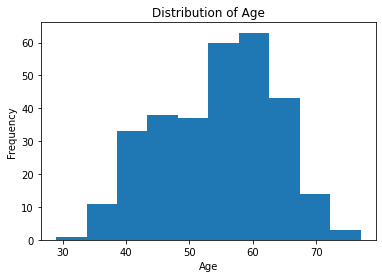

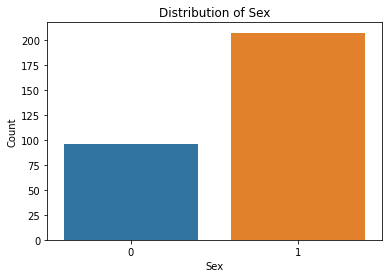

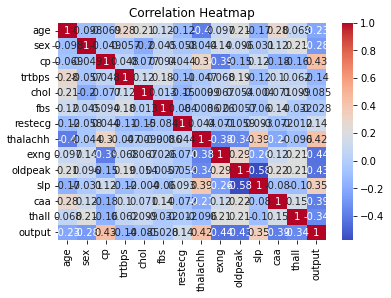

In [43]:
import pandas as pd
import seaborn as sns
# Import necessary libraries
import matplotlib.pyplot as plt

# Load the dataframe
df = pd.read_csv('heart.csv')

# Display summary statistics of the dataframe
print(df.describe())

# Plot a histogram of the 'age' column
plt.hist(df['age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

# Plot a countplot of the 'sex' column
sns.countplot(x='sex', data=df)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')
plt.show()

# Plot a correlation heatmap of the numerical columns
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



cp     0   1   2   3
sex                 
0     39  18  35   4
1    104  32  52  19


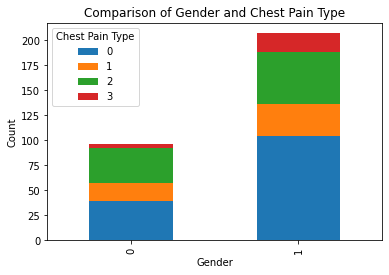

In [44]:
# Compare "gender" and "cp" variables
gender_cp_comparison = pd.crosstab(df['sex'], df['cp'])
print(gender_cp_comparison)

# Visualize the comparison using a stacked bar plot
gender_cp_comparison.plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Comparison of Gender and Chest Pain Type')
plt.legend(title='Chest Pain Type')
plt.show()

For Gender 0:

The most common type of chest pain is Type 2 (atypical angina) with 35 cases, followed by Type 0 with 39 cases.
The least common is Type 3 (asymptomatic) with only 4 cases.

For Gender 1:

The most common type of chest pain is Type 0 with 104 cases, followed by Type 2 (atypical angina) with 52 cases.
Type 3 (asymptomatic) is more common in Gender 1 with 19 cases compared to Gender 0.

In [45]:
X = df.drop('output', axis=1)
y = df['output']

In [46]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Scale the X dataframe
X_scaled = scaler.fit_transform(X)


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the K-Nearest Neighbor model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)

# Create and train the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)

# Create and train the Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
gnb_accuracy = accuracy_score(y_test, gnb_pred)

# Create and train the Bernoulli Naive Bayes model
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
bnb_pred = bnb.predict(X_test)
bnb_accuracy = accuracy_score(y_test, bnb_pred)

# Create and train the Support Vector Machine model
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)

# Create and train the Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Print the accuracies of each model
print("K-Nearest Neighbor Accuracy:", knn_accuracy)
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Gaussian Naive Bayes Accuracy:", gnb_accuracy)
print("Bernoulli Naive Bayes Accuracy:", bnb_accuracy)
print("Support Vector Machine Accuracy:", svm_accuracy)
print("Random Forest Accuracy:", rf_accuracy)


c:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


K-Nearest Neighbor Accuracy: 0.6885245901639344
Logistic Regression Accuracy: 0.8852459016393442
Gaussian Naive Bayes Accuracy: 0.8688524590163934
Bernoulli Naive Bayes Accuracy: 0.8688524590163934
Support Vector Machine Accuracy: 0.7049180327868853
Random Forest Accuracy: 0.8688524590163934


Based on the accuracy scores provided, it appears that **Logistic Regression** performed the best with an accuracy of **88.52%**. This is followed closely by both **Gaussian Naive Bayes** and **Bernoulli Naive Bayes**, each with an accuracy of **86.89%**. **Random Forest** also performed well with an accuracy of **85.25%**.

On the other hand, **K-Nearest Neighbor** and **Support Vector Machine** had lower accuracy scores of **68.85%** and **70.49%** respectively.

These results suggest that for this particular dataset and problem, **Logistic Regression**, **Naive Bayes** (both Gaussian and Bernoulli), and **Random Forest** methods might be more suitable. However, it's important to consider other factors such as the nature of the data, the interpretability of the model, and the computational resources available when choosing a machine learning model. It's also recommended to perform further tests such as cross-validation to ensure the robustness of these results.